# Decion Tree - MACHINE LEARNING: SUPERVISED LEARNING 🤖
# Find the Flag
Can you guess which continent this flag comes from?
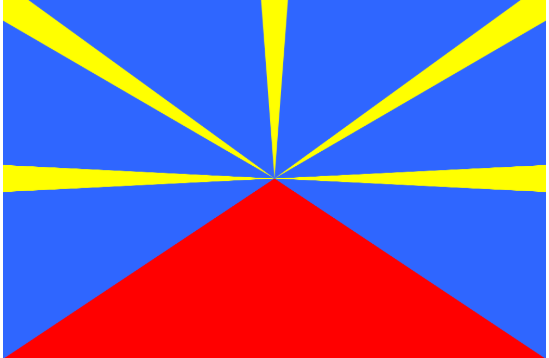
Flag of Reunion
What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

# Attribute Information:
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)


# Investigate the Data

# Before Procedding first import all the relevant libraries.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 1.Let’s start by seeing what the data looks like. Begin by loading the data into a variable named flags using Panda’s pd.read_csv() function. The function should take the name of the CSV file you want to load. In this case, our file is named "flags.csv".

We also want row 0 to be used as the header, so include the parameter header = 0.

In [5]:
flags = pd.read_csv("flag.csv", header = 0)
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# 2.Take a look at the names of the columns in our DataFrame. These are the features we have available to us. Print flags.columns.

Let’s also take a look at the first few rows of the dataset. Print flags.head().

In [7]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

# 3. Many columns contain numbers that don’t make a lot of sense. For example, the third row, which represents Algeria, has a Language of 8. What exactly does that mean?

Take a look at the Attribute Information for this dataset from UCI’s Machine Learning Repository.

Using that information along with the printout of flags.head(), can you figure out what landmass Andora is on?

In [9]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# -------------------------------------------------------------
# -------------------------------------------------------------
# Creating Your Data and Labels
# -------------------------------------------------------------
# -------------------------------------------------------------

# 4. We’re eventually going to use create a decision tree to classify what Landmass a country is on.

Create a variable named labels and set it equal to only the "Landmass" column from flags.

You can grab specific columns from a DataFrame using this syntax:

one_column = df[["A"]]
two_columns = df[["B", "C"]]
In this example, one_column will be a DataFrame of only df‘s "A" column. two_columns will be a DataFrame of the "B" and "C" columns from df.

In [12]:
labels = flags[['Landmass']]
labels.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


# 5. We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels.

You could spend a lot of time playing with groups of columns to find the that work best. But for now, let’s see if we can predict where a country is based only on the colors of its flag.

Create a variable named data and set it equal to a DataFrame containing the following columns from flags:

"Red"
"Green"
"Blue"
"Gold"
"White"
"Black"
"Orange"

In [14]:
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]
data.head()

,Red,Green,Blue,Gold,White,Black,Orange
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,0
2,1,1,0,0,1,0,0
3,1,0,1,1,1,0,1
4,1,0,1,1,0,0,0


# 6.Finally, let’s split these DataFrames into a training set and test set using the train_test_split() function. This function should take data and labels as parameters. Also include the parameter random_state = 1.

This function returns four values. Name those values train_data, test_data, train_labels, and test_labels in that order.

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

# -------------------------------------------------------------
# -------------------------------------------------------------
# Make and Test the Model
# -------------------------------------------------------------
# -------------------------------------------------------------

# 7.Create a DecisionTreeClassifier and name it tree. When you create the tree, give it the parameter random_state = 1.

In [17]:
tree = DecisionTreeClassifier(random_state = 1)

# 8. Call tree‘s .fit() method using train_data and train_labels to fit the tree to the training data.

In [18]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

# 9.Call .score() using test_data and test_labels. Print the result.

Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time. Did our decision tree beat randomly guessing?

In [19]:
score = tree.score(test_data,test_labels)
score

0.3469387755102041

# -------------------------------------------------------------
# -------------------------------------------------------------
# Tuning the Model
# -------------------------------------------------------------
# -------------------------------------------------------------

# 10. We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better!

Put your code that creates, trains, and tests the tree inside a for loop that has a variable named i that increases from 1 to 20.

Inside your for loop, when you create tree, give it the parameter max_depth = i.

We’ll now see a printout of how the accuracy changes depending on how large we allow the tree to be.



# 11. Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

To do this, we’ll need to create a list containing all of the scores. Before the for loop, create an empty list named scores. Inside the loop, instead of printing the tree’s score, use .append() to add it to scores.

In [31]:
scores = []

In [32]:
for i in range(1, 21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data,test_labels))

In [33]:
scores

[0.3469387755102041,
 0.22448979591836735,
 0.3469387755102041,
 0.32653061224489793,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041,
 0.3469387755102041]

# 12. Let’s now plot our points. Call plt.plot() using two parameters. The first should be the points on the x-axis. In this case, that is range(1, 21). The second should be scores.

Then call plt.show().

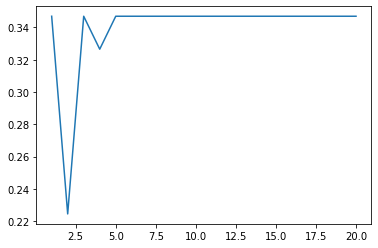

In [34]:
plt.plot(range(1,21), scores)
plt.show()